In [2]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

定义数据类

In [ ]:
class Dataset:
    def __init__(self, mode='random', means1=[-5,0], means2=[0,5]):
        if mode == 'random':
            self._random_sample(means1, means2)

    def _random_sample(self, means1, means2):
        means1, means2 = np.array(means1), np.array(means2)
        covar = np.array([1,0,0,1]).reshape(2,2)
        x1, y1 = np.random.multivariate_normal(means1, covar, size=200), np.ones((200, 1))
        x2, y2 = np.random.multivariate_normal(means2, covar, size=200), np.ones((200, 1)) * -1
        self._split(x1, y1, x2, y2)

    def _split(self, x1, y1, x2, y2):
        train_n1, train_n2 = int(x1.shape[0] * 0.8), int(x2.shape[0] * 0.8)
        self.x_train = np.concatenate((x1[:train_n1], x2[:train_n2]), axis=0)
        self.y_train = np.concatenate((y1[:train_n1], y2[:train_n2]), axis=0)
        self.x_test = np.concatenate((x1[train_n1:], x2[train_n2:]), axis=0)
        self.y_test = np.concatenate((y1[train_n1:], y2[train_n2:]), axis=0)

定义fisher判别模型 **<font color="Red">（问题1）</font>**

In [ ]:
class Fisher:
    def __init__(self):
        self.w = np.zeros((2,1))
        self.thresh = 0

    def train(self, x, y):
        assert(x.shape[0] == y.shape[0])
        y = y.flatten()

        cls1_idx = np.where(y == 1)
        cls2_idx = np.where(y == -1)
        c1 = x[cls1_idx].T
        c2 = x[cls2_idx].T
        
        mean1 = np.mean(c1, axis=-1)
        mean2 = np.mean(c2, axis=-1)
        covar1 = np.cov(c1)
        covar2 = np.cov(c2)

        sw = covar1 + covar2
        self.w = np.matmul(np.linalg.inv(sw), (mean1 - mean2))
        self.thresh = np.matmul(self.w.T, mean1 + mean2) / 2
        print('Finish training!')
        print('covar1: {}'.format(covar1))
        print('covar2: {}'.format(covar2))
        print('mean1: {}'.format(mean1))
        print('mean2: {}'.format(mean2))
        print('w: {}'.format(self.w))
        print('thereshold: {}'.format(self.thresh))

        return self.w, self.thresh

    def eval(self, x, y):
        assert(x.shape[0] == y.shape[0])
        
        yhat = np.matmul(x, self.w)
        yhat = np.sign(yhat - self.thresh)
        yhat = yhat.reshape(-1,1)
        correct_num = len(np.where((yhat - y) == 0)[1])
        accuracy = correct_num / y.shape[0]
        print('accuracy: %.2f'%accuracy)



生成随机点数据并可视化

Size of Dataset: 
x_train: (320, 2)
y_train: (320, 1)
x_test: (80, 2)
y_test: (80, 1)


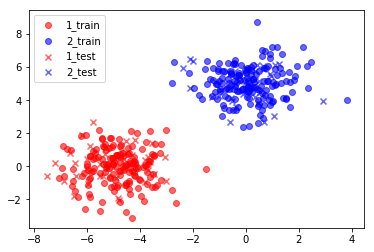

In [ ]:
data = Dataset(mode='random')
x_train, x_test = data.x_train, data.x_test
y_train, y_test = data.y_train, data.y_test
print('Size of Dataset: ')
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))
c1 = plt.scatter(x_train[:160,0], x_train[:160,1], alpha=0.6, marker='o', c='red')
c2 = plt.scatter(x_train[160:,0], x_train[160:,1], alpha=0.6, marker='o', c='blue')
c3 = plt.scatter(x_test[:40,0], x_test[:40,1], alpha=0.6, marker='x', c='red')
c4 = plt.scatter(x_test[40:,0], x_test[40:,1], alpha=0.6, marker='x', c='blue')
plt.legend(handles=[c1, c2, c3, c4],labels=['1_train','2_train', '1_test', '2_test'],loc='best')
plt.show()

训练两个模型，统计准确率、运行时间和数据可视化。 **<font color="Red">（问题2）</font>**

Finish training!
covar1: [[ 0.91312757 -0.01534069]
 [-0.01534069  1.1948484 ]]
covar2: [[1.0472367  0.0471188 ]
 [0.0471188  1.03398719]]
mean1: [-4.83763464 -0.03005989]
mean2: [0.1003186  5.04296826]
w: [-2.48257343 -2.24069315]
thereshold: 0.2641727224006587
accuracy: 1.00

Result:
[-2.36865802  2.50645419]
k: 0.9025687337674952
b: 4.6443308552013995


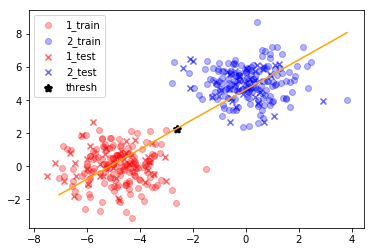

accuracy: 1.00


In [ ]:
classifier = Fisher()
w, thresh = classifier.train(x_train, y_train)
classifier.eval(x_train, y_train)

xmin = np.min(x_train[:,0])
xmax = np.max(x_train[:,0])
center = np.mean(x_train, axis=0)
k = w[1] / w[0]
b = center[1] - k * center[0]
print("\nResult:")
print(center)
print('k: {}'.format(k))
print('b: {}'.format(b))

point1, point2 = [xmin, xmax], [k*xmin+b, k*xmax+b]

c1 = plt.scatter(x_train[:160,0], x_train[:160,1], alpha=0.3, marker='o', c='red')
c2 = plt.scatter(x_train[160:,0], x_train[160:,1], alpha=0.3, marker='o', c='blue')
c3 = plt.scatter(x_test[:40,0], x_test[:40,1], alpha=0.6, marker='x', c='red')
c4 = plt.scatter(x_test[40:,0], x_test[40:,1], alpha=0.6, marker='x', c='blue')
x1 = ((k*center[1]-b)+center[0])/(1+k**2)
thresh_point = [x1, k*x1+b]
thresh = plt.scatter(thresh_point[0], thresh_point[1], marker='*', c='black', linewidths=3)
plt.plot(point1,point2,c='orange')
plt.legend(handles=[c1, c2, c3, c4, thresh],labels=['1_train','2_train', '1_test', '2_test', 'thresh'],loc='best')
plt.show()

classifier.eval(x_test, y_test)

- 可以看出，在训练Fisher判别器时，其输出的协方差矩阵和均值基本等于随机生成该数据集时的给定参数

- 图中直线表示投影轴，黑色点表示投影后分类的阈值